In [26]:
!pip install missingno

In [27]:
import pandas as pd #Data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [4]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# No SalePrice class be careful we will try to guess this class

In [11]:
# in machine learning, if the columns are the attribute rows, the sample is called
df_train.set_index("Id",inplace=True)
df_test.set_index("Id",inplace=True)

In [12]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
print("Train shape : ",df_train.shape)
print("Test shape : ",df_test.shape)

Train shape :  (1460, 80)
Test shape :  (1459, 79)


In [14]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [15]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [18]:
cols_with_null=df_train.isnull().sum().sort_values(ascending=False)
cols_with_null.head(21)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
dtype: int64

In [19]:
df_train.isnull().sum().sum()

6965

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
df_train["SalePrice"].isnull().sum() 
# we look for missing data in the target variable

0

In [22]:
# get rid of columns with too much data missing
cols_to_drop=(cols_with_null.head(6).index).tolist()

In [23]:
cols_to_drop

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

In [24]:
df_train.drop(cols_to_drop,axis=1,inplace=True)
df_test.drop(cols_to_drop,axis=1,inplace=True)

In [28]:
df_train.shape

(1460, 74)

In [29]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


<AxesSubplot:>

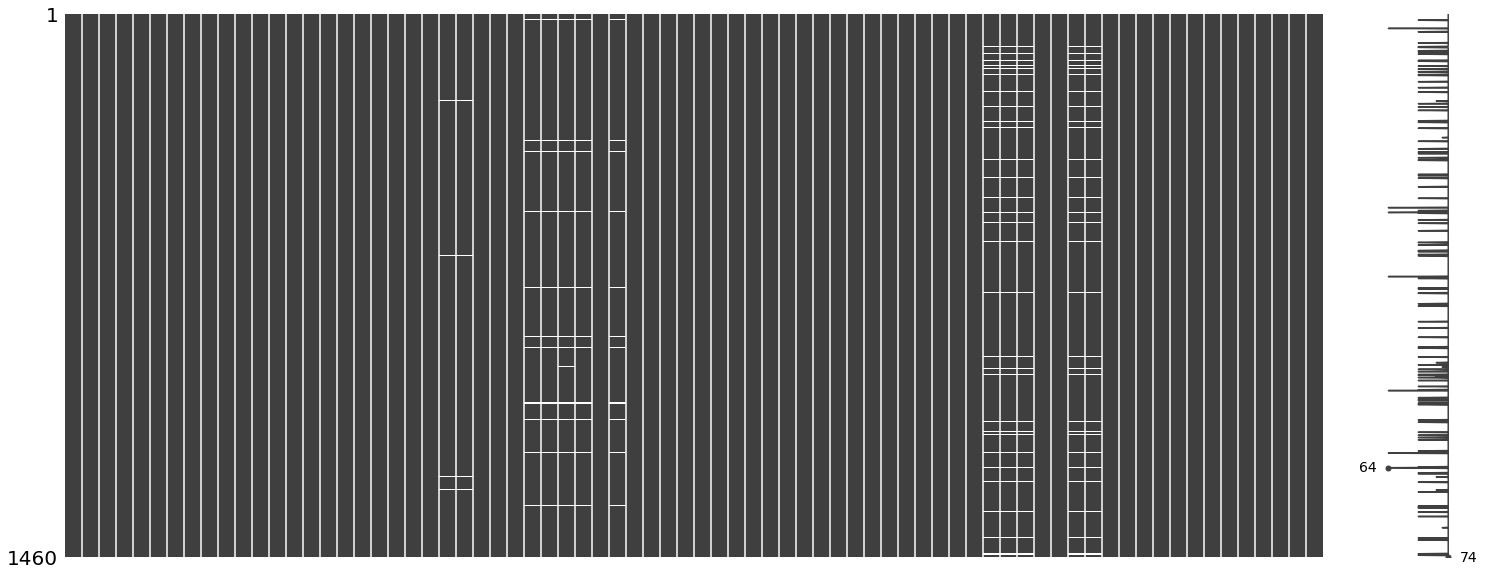

In [30]:
missingno.matrix(df_train)

<AxesSubplot:>

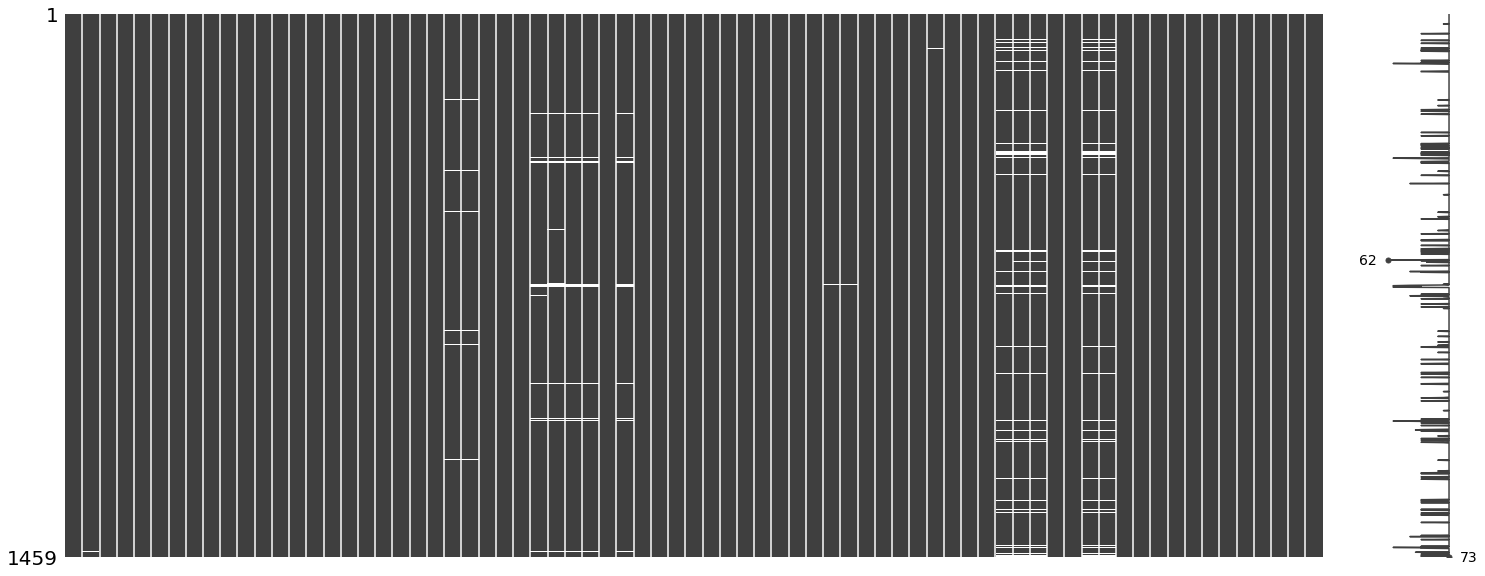

In [31]:
missingno.matrix(df_test)

In [36]:
num_cols = ['MSSubClass','LotArea', 'OverallQual', 
            'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
            'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

<AxesSubplot:>

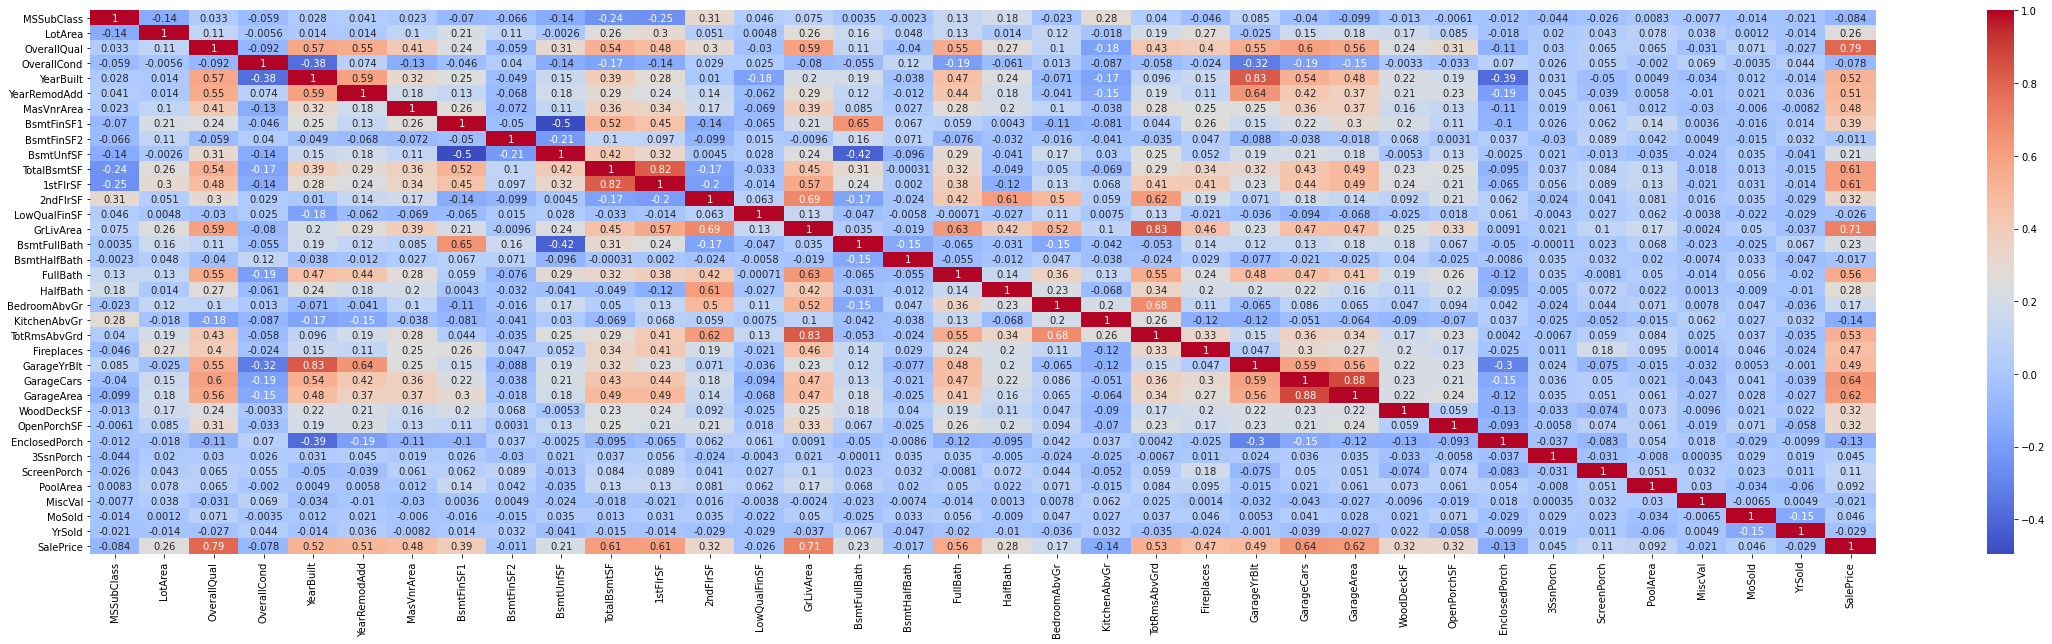

In [37]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.heatmap(data=df_train[num_cols].corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

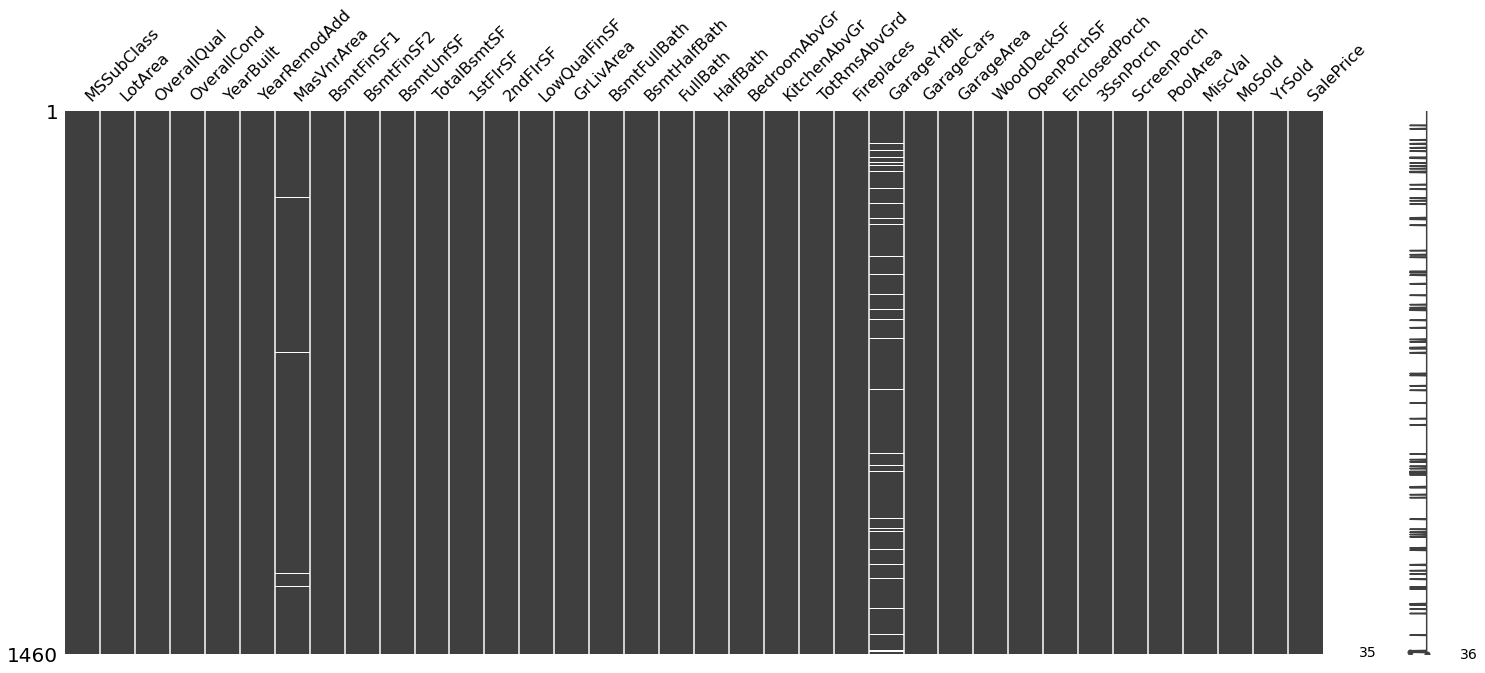

In [39]:
missingno.matrix(df_train[num_cols])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

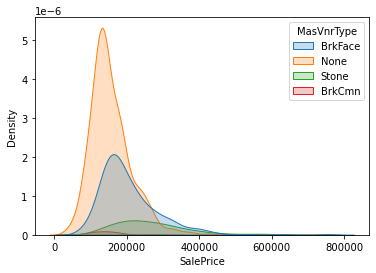

In [42]:
sns.kdeplot(data=df_train, x="SalePrice", hue="MasVnrType", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

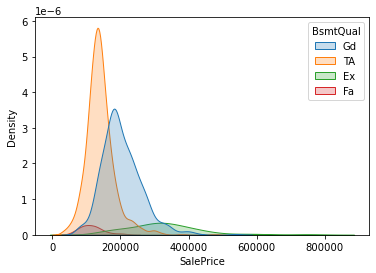

In [43]:
sns.kdeplot(data=df_train, x="SalePrice", hue="BsmtQual", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

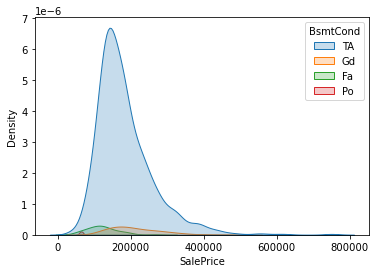

In [44]:
sns.kdeplot(data=df_train, x="SalePrice", hue="BsmtCond", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

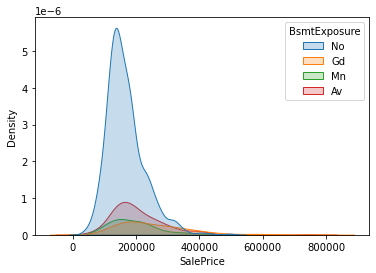

In [45]:
sns.kdeplot(data=df_train, x="SalePrice", hue="BsmtExposure", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

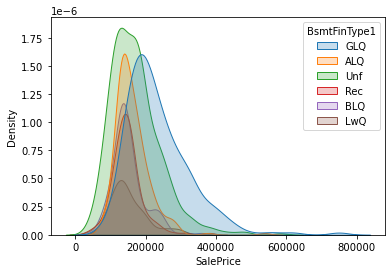

In [46]:
sns.kdeplot(data=df_train, x="SalePrice", hue="BsmtFinType1", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

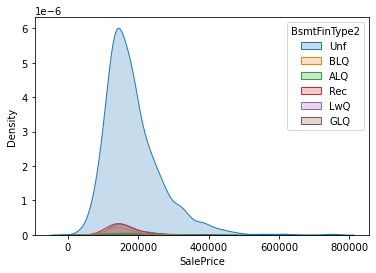

In [47]:
sns.kdeplot(data=df_train, x="SalePrice", hue="BsmtFinType2", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

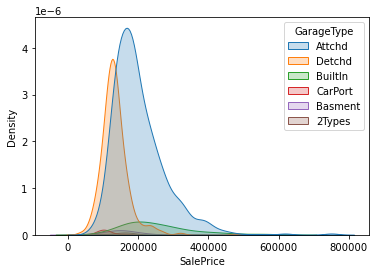

In [48]:
sns.kdeplot(data=df_train, x="SalePrice", hue="GarageType", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

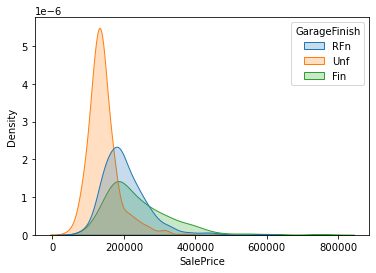

In [49]:
sns.kdeplot(data=df_train, x="SalePrice", hue="GarageFinish", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

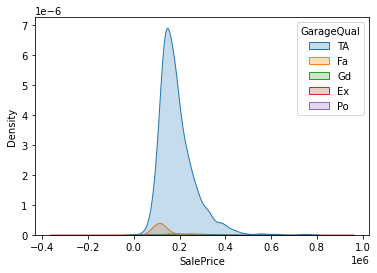

In [50]:
sns.kdeplot(data=df_train, x="SalePrice", hue="GarageQual", fill=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

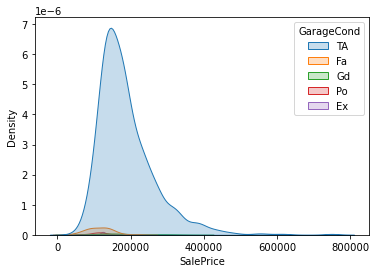

In [51]:
sns.kdeplot(data=df_train, x="SalePrice", hue="GarageCond", fill=True)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

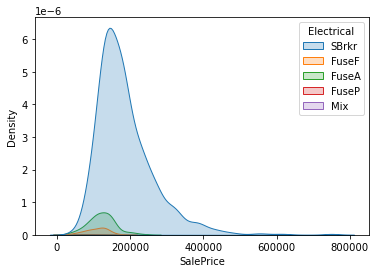

In [52]:
sns.kdeplot(data=df_train, x="SalePrice", hue="Electrical", fill=True)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

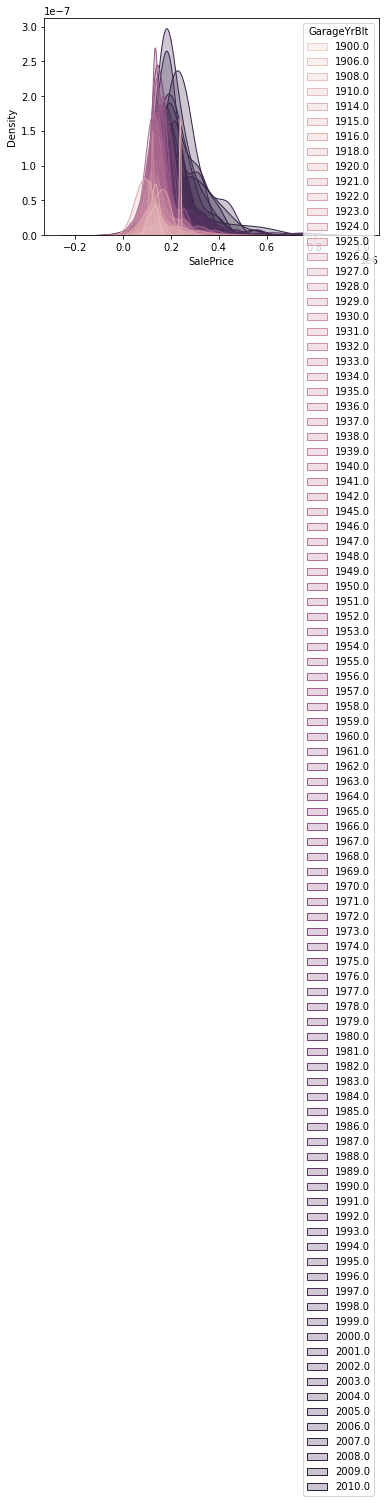

In [53]:
sns.kdeplot(data=df_train, x="SalePrice", hue="GarageYrBlt", fill=True)

In [55]:
y = df_train.SalePrice #TArget variable
X = df_train.drop(["SalePrice"],axis=1)

In [56]:
X_train , X_val , y_train , y_val =train_test_split(X,y,train_size=0.8,random_state=0)

In [60]:
categorical_cols=[cname for cname in X_train.columns if X_train[cname].nunique()<10
                 and X_train[cname].dtype=="object"]

In [61]:
len(categorical_cols)

35

In [62]:
numerical_cols=[cname for cname in X_train.columns 
                if X_train[cname].dtype in ["int64","float64"]]

In [63]:
len(numerical_cols)

35

In [64]:
my_cols=categorical_cols+numerical_cols

In [65]:
X_train=X_train[my_cols]
X_val=X_val[my_cols]
X_test=df_test[my_cols]

In [66]:
numerical_transformer=Pipeline(steps=[("imputer_num",SimpleImputer(strategy="median")),
                                     ("scaler",StandardScaler())
                                     ])

In [67]:
categorical_transformer=Pipeline(steps=[
    ("imputer_cal",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))  
])

In [68]:
preprocessor=ColumnTransformer(transformers=[
    ("num",numerical_transformer,numerical_cols),
    ("cat",categorical_transformer,categorical_cols)
    
])

In [69]:
rf=RandomForestRegressor(n_estimators=100,random_state=0)

In [70]:
my_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",rf)
])

In [71]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'Gr...
                                                   'LandSlope', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', ...])])),
                ('model', RandomForestRegressor(random_state=0))])

In [72]:
val_preds=my_pipeline.predict(X_val)

In [73]:
print("VAL MAE : ",mean_absolute_error(y_val,val_preds))

VAL MAE :  17721.242602739727


In [74]:
scores=-1*cross_val_score(my_pipeline,X,y,cv=5,scoring="neg_mean_absolute_error")

In [75]:
scores.mean()

17568.15694520548

In [76]:
##****
df_sub=pd.read_csv("sample_submission.csv")

In [77]:
df_sub['total']=0

In [78]:
df_sub

,Id,SalePrice,total
0,1461,169277.052498,0
1,1462,187758.393989,0
2,1463,183583.683570,0
3,1464,179317.477511,0
4,1465,150730.079977,0
...,...,...,...
1454,2915,167081.220949,0
1455,2916,164788.778231,0
1456,2917,219222.423400,0
1457,2918,184924.279659,0


In [79]:
df_sub.set_index('Id',inplace=True)

In [80]:
df_sub.head()

,SalePrice,total
Id,,
1461,169277.052498,0
1462,187758.393989,0
1463,183583.683570,0
1464,179317.477511,0
1465,150730.079977,0


In [81]:
df_sub['SalePrice'].to_csv('submission_Orkun.csv')

In [82]:
df_sub

,SalePrice,total
Id,,
1461,169277.052498,0
1462,187758.393989,0
1463,183583.683570,0
1464,179317.477511,0
1465,150730.079977,0
...,...,...
2915,167081.220949,0
2916,164788.778231,0
2917,219222.423400,0
